In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#build the train and test dataset.
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, "%m/%d/%Y")
raw = pd.read_csv('NYPD_Complaint_Data_Current__Year_To_Date_.csv', parse_dates=['CMPLNT_FR_DT'], date_parser=dateparse)
raw['CMPLNT_FR_TM'] = pd.to_datetime(raw['CMPLNT_FR_TM'],format= '%H:%M:%S').dt.time
raw['CMPLNT_FR_DT'] = pd.to_datetime(raw['CMPLNT_FR_DT'], errors = 'coerce')
raw = raw.sort_values(by=['CMPLNT_FR_DT'], ignore_index=True)

print("raw data: ", raw.shape)

raw data:  (306656, 36)


In [ ]:
# raw = pd.DataFrame(raw)
# #time distribution of crime, victim data, crime type
# raw

In [ ]:
# get the number of crimes in different area
X_train = raw['BORO_NM']
X_train

0                QUEENS
1         STATEN ISLAND
2             MANHATTAN
3             MANHATTAN
4                QUEENS
              ...      
306651         BROOKLYN
306652           QUEENS
306653           QUEENS
306654            BRONX
306655    STATEN ISLAND
Name: BORO_NM, Length: 306656, dtype: object

In [ ]:
area = ['QUEENS', 'STATEN ISLAND', 'MANHATTAN','BRONX','BROOKLYN']
crime_in_QUEENS, crime_in_S_ISLAND, crime_in_MANHATTAN, crime_in_BRONX, crime_in_BROOKLYN = 0,0,0,0,0
for i in range(len(X_train)):
    if X_train[i] == 'QUEENS':
        crime_in_QUEENS += 1
    elif X_train[i] == 'STATEN ISLAND':
        crime_in_S_ISLAND += 1
    elif X_train[i] == 'MANHATTAN':
        crime_in_MANHATTAN += 1
    elif X_train[i] == 'BRONX':
        crime_in_BRONX += 1
    elif X_train[i] == 'BROOKLYN':
        crime_in_BROOKLYN += 1

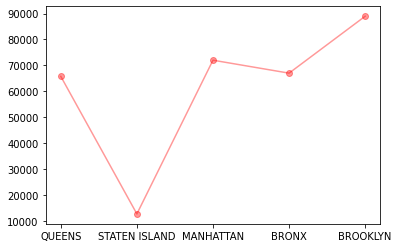

In [ ]:
Y_crime_num = [crime_in_QUEENS, crime_in_S_ISLAND, crime_in_MANHATTAN, crime_in_BRONX, crime_in_BROOKLYN]
Y_crime_num
X_area = area

p_crime = plt.plot(X_area, Y_crime_num, 'o-', c = "r",alpha = 0.4)
plt.show()

In [ ]:
Crime_time = []
for i in range(len(raw['CMPLNT_FR_TM'])):
    Crime_time.append(raw['CMPLNT_FR_TM'][i].strftime("%H"))

In [ ]:
time_hour = np.zeros(24,)

In [ ]:
time_hour = np.zeros(24,)
for i in Crime_time:
    for j in range(0, 25):
        if float(i) == j:
            time_hour[j] += 1
            
time_hour

array([14749.,  9839.,  8040.,  6903.,  5803.,  4691.,  5061.,  6573.,
        9909., 11118., 12516., 12916., 17569., 14944., 16172., 18038.,
       18195., 18692., 18607., 17377., 17051., 15000., 14102., 12791.])

In [ ]:
#train set, what time is more likely to exact a crime, is there any outliers
time_train = []
for i in range(len(time_hour)):
    time_train.append([i,float(time_hour[i])])
time_train    

[[0, 14749.0],
 [1, 9839.0],
 [2, 8040.0],
 [3, 6903.0],
 [4, 5803.0],
 [5, 4691.0],
 [6, 5061.0],
 [7, 6573.0],
 [8, 9909.0],
 [9, 11118.0],
 [10, 12516.0],
 [11, 12916.0],
 [12, 17569.0],
 [13, 14944.0],
 [14, 16172.0],
 [15, 18038.0],
 [16, 18195.0],
 [17, 18692.0],
 [18, 18607.0],
 [19, 17377.0],
 [20, 17051.0],
 [21, 15000.0],
 [22, 14102.0],
 [23, 12791.0]]

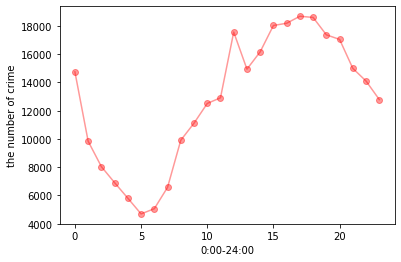

In [ ]:
#raw['CMPLNT_FR_TM']
plt.xlabel('0:00-24:00')
plt.ylabel('the number of crime')
p_time = plt.plot(range(0,24), time_hour, 'o-', c = "r",alpha = 0.4)

In [ ]:
test_time_set = []
pre_time_hour = np.random.randint(1,19000, size=(25))
for i in range(len(pre_time_hour)):
    test_time_set.append([i, pre_time_hour[i]])
test_time_set

[[0, 832],
 [1, 3186],
 [2, 302],
 [3, 8393],
 [4, 4886],
 [5, 12513],
 [6, 9673],
 [7, 6591],
 [8, 586],
 [9, 7004],
 [10, 8545],
 [11, 17481],
 [12, 8774],
 [13, 9545],
 [14, 10092],
 [15, 13020],
 [16, 398],
 [17, 14750],
 [18, 17004],
 [19, 11690],
 [20, 4844],
 [21, 77],
 [22, 17687],
 [23, 15412],
 [24, 4089]]

In [ ]:
time_hour = time_hour.reshape(-1, 1)
pre_time_hour = np.arange(0,25)
pre_time_hour = pre_time_hour.reshape(-1, 1)

from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0).fit(time_train)
Pre_outliers = clf.fit_predict(time_train)
Pre_outliers

array([-1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1, -1, -1, -1])

In [ ]:
time_hour_outliere = np.zeros(len(Pre_outliers))

for i in range(len(Pre_outliers)):
    if Pre_outliers[i] == -1:
        time_hour_outliere[i] = time_hour[i]
time_hour_outliere

array([14749.,  9839.,  8040.,     0.,  5803.,  4691.,  5061.,     0.,
           0.,     0.,     0.,     0., 17569.,     0.,     0.,     0.,
           0.,     0., 18607.,     0.,     0., 15000., 14102., 12791.])

In [ ]:
outlier = [i for i,x in enumerate(Pre_outliers) if x==-1]
print(outlier)
# time_hour_outliere

[0, 1, 2, 4, 5, 6, 12, 18, 21, 22, 23]


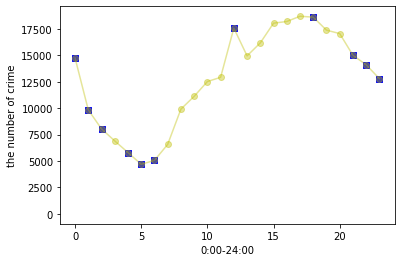

In [ ]:
plt.xlabel('0:00-24:00')
plt.ylabel('the number of crime')
p_time_out = plt.plot(outlier, time_hour_outliere[outlier], 's', c = "b",alpha = 1)
p_time_out = plt.plot(outlier, np.zeros(len(outlier)), 's', c = "w",alpha = 1)

p_time = plt.plot(range(0,24), time_hour, 'o-', c = "y",alpha = 0.4)